**Chapter 16 - Confidence Intervals for Proportions**

**<u>Modeling the Distribution of Sample Proportions (or Means):</u>**

- Imagine what would happen if we were to actually draw many samples.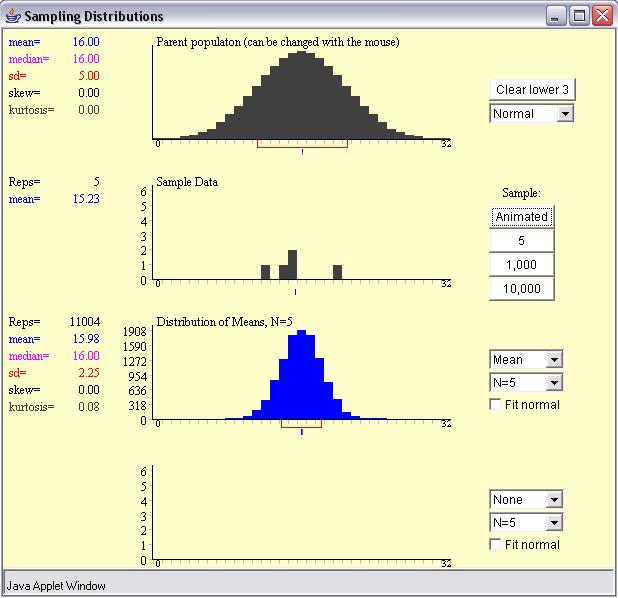

- Now imagine what would happen if we looked at the sample proportions (or means) for these samples.

- The histogram we’d get if we could see all the proportions (or means) from all possible samples is called the **sampling distribution of the proportions (or means)**.

- A **sampling distribution model** for how a sample proportion (or mean) varies from sample to sample allows us to quantify that variation and how likely it is that we’d observe a sample proportion (or mean) in any particular interval.

**<u>Modeling the Distribution of Sample Proportions (Normal Models):</u>**

- To use a Normal model, we need to specify its mean and standard deviation. We’ll put µ, the mean of the Normal, at *p*.

- When working with proportions, knowing the mean automatically gives us the standard deviation as well—the standard deviation we will use is

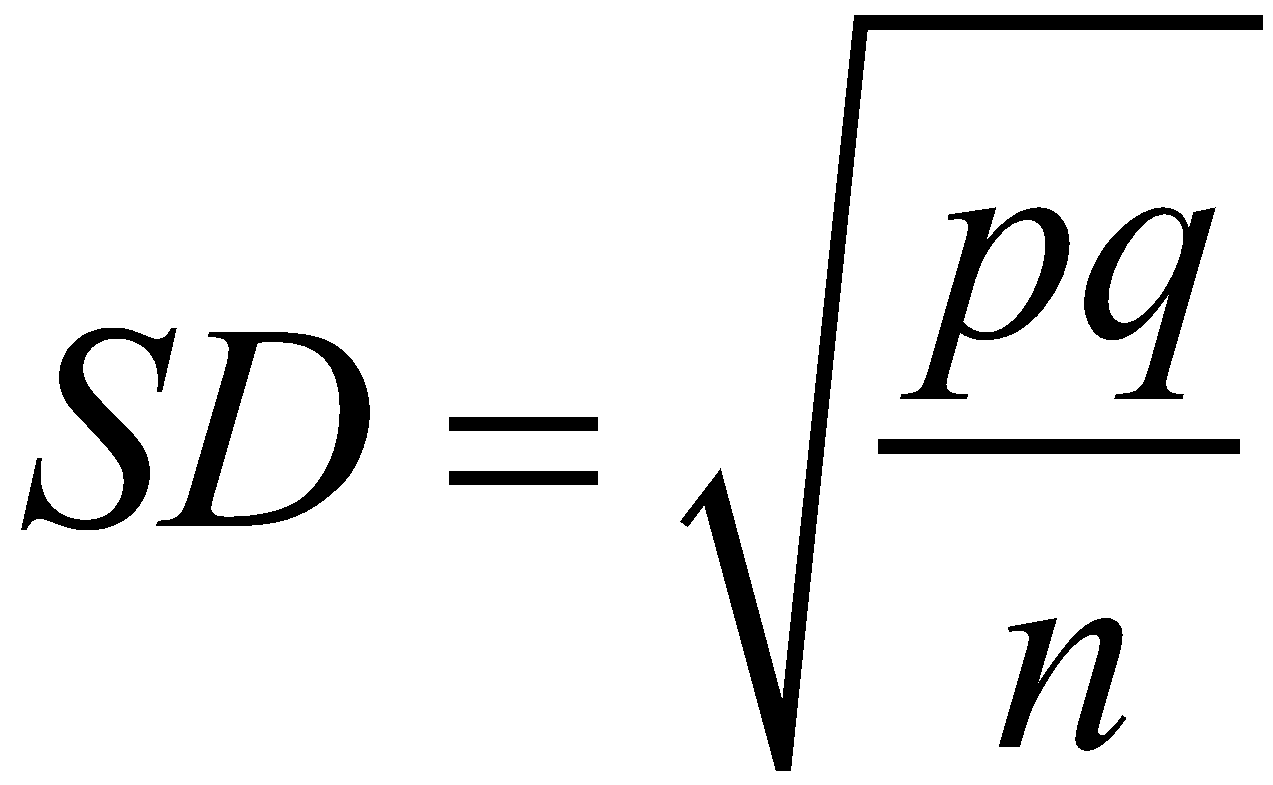

- So, the distribution of the sample proportions is modeled with a probability model that is

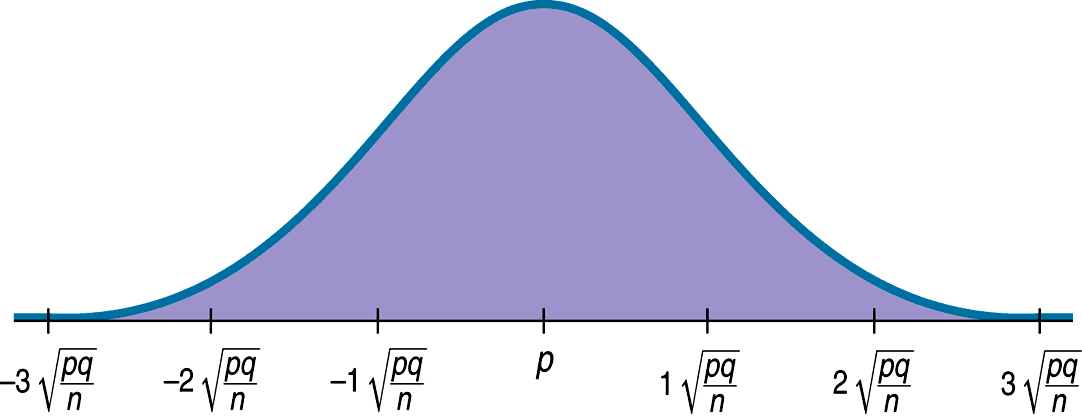

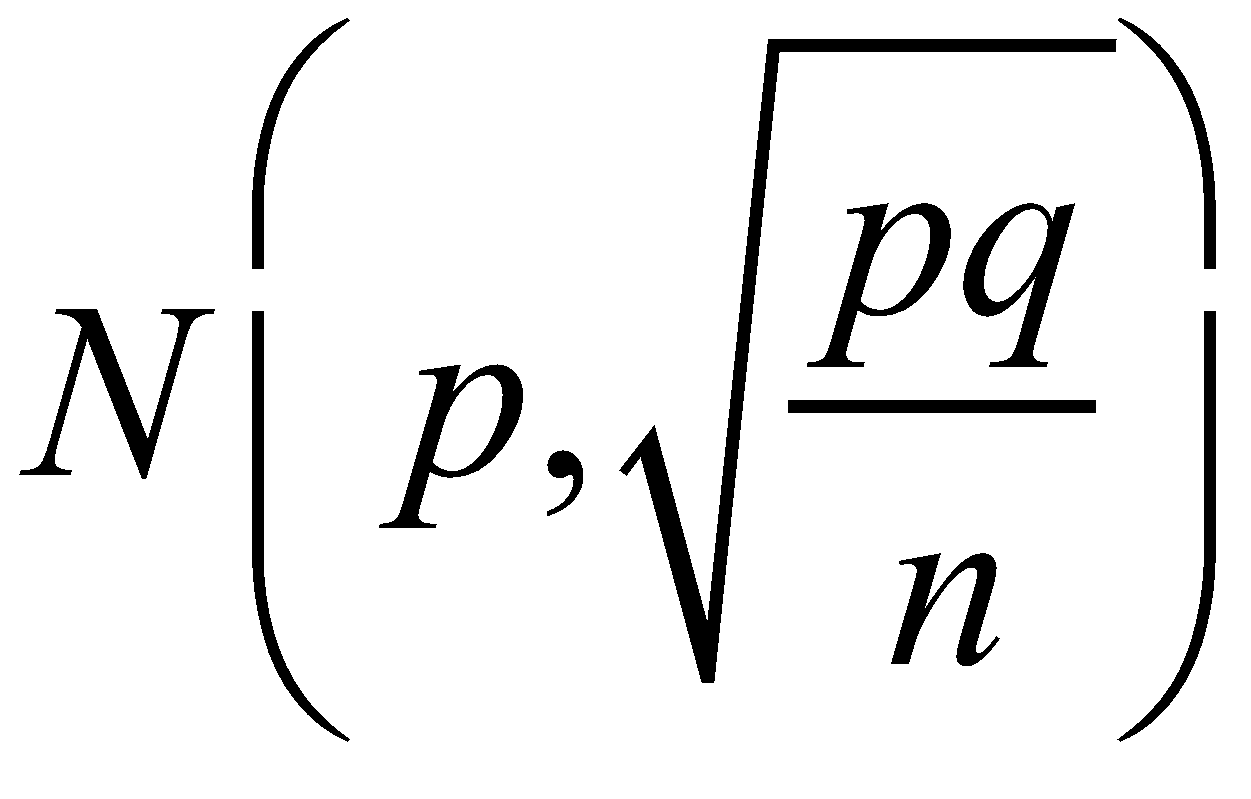

- Because we have a Normal model, for example, we know that 95% of Normally distributed values are within two standard deviations of the mean.

- So we should not be surprised if 95% of various polls gave results that were near the mean but varied above and below that by no more than two standard deviations.

- This is what we mean by **sampling error**. It’s not really an error at all, but just variability you’d expect to see from one sample to another. A better term would be **sampling variability**.

- The Normal model gets better as a good model for the distribution of sample proportions as the sample size gets bigger.

**<u>Assumptions and Conditions:</u>**

- **The Independence Assumption:** The sampled values must be independent of each other.

  - **Randomization Condition**: The sample should be a simple random sample of the population.

  - **10% Condition:** the sample size, n, must be no larger than 10% of the population

- **The Sample Size Assumption:** The sample size, n, must be large enough.

  - **Success/Failure Condition:** The sample size has to be big enough so that both np (number of successes) and nq (number of failures) are at least 10.

- Basically, we need a large enough sample that is not too large.

Examples:

1.  Of all cars on the interstate, 80% exceed the speed limit. What proportion of speeders might we see among the next 50 cars?

2.  We don’t know it, but 52% of voters plan to vote “Yes” on the upcoming school budget. We poll a random sample of 300 voters. What might the percentage of yes-voters appear to be in our poll?

3.  “Groovy” M & M’s are supposed to make up 30% of the candies sold. In a large bag of 250 M&M’s, what is the probability that we get at least 25% groovy candies?

**Key Vocabulary:**

- <u>Standard error:</u> When we estimate the standard deviation of a sampling distribution using statistics found from the data, the estimate is called a standard error:

> 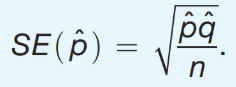

- <u>Confidence level:</u> A level C confidence interval for a model parameter is an interval of values usually of the form *Estimate ± Margin of Error* found from data in such a way that C% of all random samples will yield intervals that capture the true parameter value.

- <u>Confidence interval:</u> A confidence interval for the true value of a proportion. The confidence interval is

> $`\widehat{p} \pm z*SE\left( \ \widehat{p}\  \right)`$
>
> where z\* is a critical value from the Standard Normal model corresponding to the specified confidence level.

- <u>Margin of error:</u> In a confidence interval, the extent of the interval on either side of the observed statistic value is called the margin of error. A margin of error is typically the product of a critical value from the sampling distribution and a standard error from the data. A small margin of error corresponds to a confidence interval that pins down the parameter precisely. A large margin of error corresponds to a confidence interval that gives relatively little information about the estimated parameter. For a proportion

> 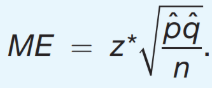

- <u>Critical value:</u> The number of standard errors to move away from the sample statistic to specify an interval that corresponds to the specified level of confidence. The critical value, denoted z\*, is usually found from a table or with technology.

Examples:

Your local newspaper polls a random sample of 330 voters, finding 144 who say they will vote “yes” on the upcoming school budget. Create a 95% confidence interval for actual sentiment of all voters.

An experiment finds that 27% of 53 subjects report improvement after using a new medicine. Create a 95% confidence interval for the actual cure rate. Why is this interval so wide? Make it narrower – 90% confidence. What are the advantages and disadvantages? What sample size would we need in a follow-up study if we want a margin of error of 5% with 98% confidence?

What sample size does it take to estimate the outcome of an election with a margin of error of 3%?


### Interactive Experiment: The Margin of Error Tug-of-War

Constructing a Confidence Interval is a trade-off.
*   We want to be **Confident** (High Confidence Level) $\rightarrow$ This makes the interval **Wider** (Larger ME).
*   We want to be **Precise** (Small Margin of Error) $\rightarrow$ This requires a **Larger Sample Size ($n$)**.

**Explore:**
*   Increase $n$ and watch the purple bar shrink (more precise).
*   Increase Confidence (e.g., to 99.9%) and watch the bar grow (less precise, but "safer").


In [ ]:
# @title Click 'Play' to Run Code

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from IPython.display import display

def plot_margin_of_error(n, conf_level):
    # Calculate Z score
    alpha = 1 - conf_level
    z_score = stats.norm.ppf(1 - alpha/2)
    
    # Assume p_hat = 0.5 (worst case / most conservative)
    p_hat = 0.5
    
    # ME Formula: ME = z * sqrt(p(1-p)/n)
    me = z_score * np.sqrt((p_hat * (1 - p_hat)) / n)
    
    # Create Tug of War Plot
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Plot ME as a horizontal bar centered at 0
    ax.barh(0, 2*me, height=0.5, left=-me, color='purple', alpha=0.6, label='Confidence Interval Width')
    ax.barh(0, 0.005, height=0.6, left=-0.0025, color='black') # Center point
    
    ax.set_xlim(-0.2, 0.2)
    ax.set_ylim(-1, 1)
    ax.set_yticks([])
    ax.set_xlabel('Error from True Proportion')
    ax.set_title(f"Margin of Error (ME) = ±{me:.3f} ({me:.1%})\nSample Size n={n}, Confidence={conf_level:.0%}")
    
    # Add Text Annotations
    ax.text(0, -0.6, f"Interval Width: {2*me:.3f}", ha='center')
    ax.text(-me, 0.3, f"-{me:.3f}", ha='center')
    ax.text(me, 0.3, f"+{me:.3f}", ha='center')
    
    ax.grid(axis='x', alpha=0.3)
    plt.show()

# Controls
style = {'description_width': 'initial'}
n_slider = widgets.IntSlider(value=100, min=10, max=2000, step=10, description='Sample Size (n):', style=style)
conf_slider = widgets.FloatSlider(value=0.95, min=0.80, max=0.999, step=0.005, description='Confidence Level:', style=style)

display(widgets.interactive(plot_margin_of_error, n=n_slider, conf_level=conf_slider))



### Interactive Experiment: What does "95% Confidence" Mean?

A Confidence Interval (CI) is a range of values calculated from sample data that is likely to cover the true population parameter.
But what does "95% confident" actually mean?

It means that if we took many, many samples and calculated a CI for each one, about **95% of those intervals would capture the true parameter**.

**Explore:**
*   The **Black Dashed Line** is the **True Parameter ($p$)**. We (the simulators) know it, but the intervals don't!
*   **Green Lines**: Intervals that successfully "captured" the true $p$.
*   **Red Lines**: Intervals that missed.
*   Change the **Confidence Level** to 90% or 99% and see how the width of the intervals changes, and how many red lines appear.


In [ ]:
# @title Click 'Play' to Run Code

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from IPython.display import display, clear_output

def simulate_ci(n, p, confidence_level):
    n_sims = 100
    
    # Generate simulations
    # X ~ Binomial(n, p)
    x = np.random.binomial(n, p, n_sims)
    p_hats = x / n
    
    # Calculate intervals
    z_score = stats.norm.ppf(1 - (1 - confidence_level)/2)
    std_errors = np.sqrt(p_hats * (1 - p_hats) / n)
    margins_of_error = z_score * std_errors
    
    lower_bounds = p_hats - margins_of_error
    upper_bounds = p_hats + margins_of_error
    
    # Check capture
    captured = (lower_bounds <= p) & (upper_bounds >= p)
    capture_rate = np.mean(captured)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Plot intervals
    for i in range(n_sims):
        color = 'green' if captured[i] else 'red'
        plt.plot([i, i], [lower_bounds[i], upper_bounds[i]], color=color, alpha=0.6)
        plt.plot(i, p_hats[i], 'o', color=color, markersize=3)
        
    plt.axhline(p, color='black', linestyle='--', linewidth=2, label=f'True p = {p}')
    
    plt.title(f'Confidence Interval Simulation (n={n}, p={p}, Confidence={confidence_level:.0%})\nCapture Rate: {capture_rate:.0%}')
    plt.xlabel('Simulation Number (1-100)')
    plt.ylabel('Proportion')
    plt.ylim(max(0, p - 0.2), min(1, p + 0.2))
    plt.legend()
    plt.grid(alpha=0.2)
    
    # Highlighting 'Red' intervals
    if not all(captured):
        plt.text(0.5, 0.05, f"Red lines missed the true parameter!", ha='center', transform=plt.gca().transAxes, color='red')
        
    plt.show()

# Controls
style = {'description_width': 'initial'}
n_slider = widgets.IntSlider(value=50, min=10, max=500, step=10, description='Sample Size (n):', style=style)
p_slider = widgets.FloatSlider(value=0.5, min=0.1, max=0.9, step=0.05, description='True Prop (p):', style=style)
conf_dropdown = widgets.Dropdown(options=[0.90, 0.95, 0.99], value=0.95, description='Confidence Level:', style=style)

ui = widgets.VBox([widgets.HBox([n_slider, p_slider]), conf_dropdown])
out = widgets.interactive_output(simulate_ci, {'n': n_slider, 'p': p_slider, 'confidence_level': conf_dropdown})

display(ui, out)
